## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

## Leitura dos Dados

In [2]:
Games_dados = pd.read_csv("../dados/vgsales-12-4-2019.csv")

## Explorando os Dados

In [3]:
Games_dados.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [4]:
Games_dados.shape

(55792, 23)

### Verificando a distribuição do total de vendas

In [5]:
Games_dados.Global_Sales.mean()

0.3655029616276456

In [6]:
Games_dados.Global_Sales.median()

0.12

In [7]:
Games_dados.Global_Sales.mode()

0    0.0
dtype: float64

In [8]:
# Dado um conjunto de dados, a variância é uma medida de dispersão que mostra o quão distante cada valor desse conjunto 
# está do valor central (médio). Quanto menor é a variância, mais próximos os valores estão da média; 
# mas quanto maior ela é, mais os valores estão distantes da média.
Games_dados.Global_Sales.var()

0.6939250161521385

In [9]:
# Um baixo desvio padrão indica que os pontos dos dados tendem a estar próximos da média ou do valor esperado. 
# Um alto desvio padrão indica que os pontos dos dados 
# estão espalhados por uma ampla gama de valores.
Games_dados.Global_Sales.std()

0.833021618058102

In [10]:
Games_dados.Global_Sales.describe()

count    19415.000000
mean         0.365503
std          0.833022
min          0.000000
25%          0.030000
50%          0.120000
75%          0.360000
max         20.320000
Name: Global_Sales, dtype: float64

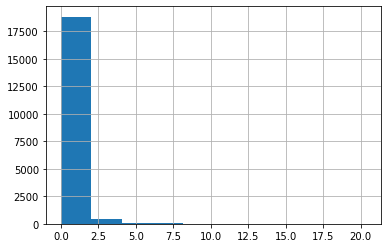

In [15]:
Games_dados.Global_Sales.hist()

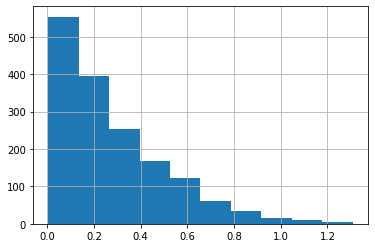

In [12]:
Games_dados['Log_Global_Sales'] = Games_dados['Global_Sales'].apply(np.log10)
Games_dados[Games_dados['Log_Global_Sales'] > 0]['Log_Global_Sales'].hist()

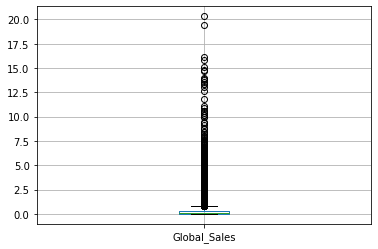

In [13]:
Games_dados.boxplot(column=['Global_Sales'])

In [16]:
Games_dados.Global_Sales.sort_values(ascending = False).head()

19    20.32
20    19.39
30    16.15
32    15.86
34    15.09
Name: Global_Sales, dtype: float64

### Verificando o Gênero/Plataforma com maior presença no dataset

In [17]:
Games_dados.Genre.mode()

0    Misc
dtype: object

In [18]:
Games_dados.Genre.describe()

count     55792
unique       20
top        Misc
freq       9476
Name: Genre, dtype: object

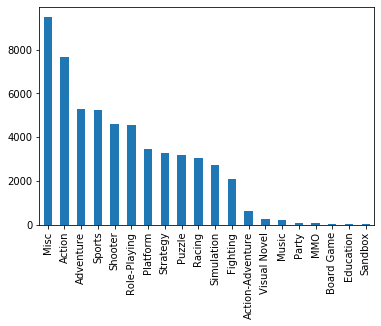

In [19]:
Games_dados.Genre.value_counts().plot.bar()

In [20]:
Games_dados.Platform.mode()

0    PC
dtype: object

In [21]:
Games_dados.Platform.describe()

count     55792
unique       74
top          PC
freq      10978
Name: Platform, dtype: object

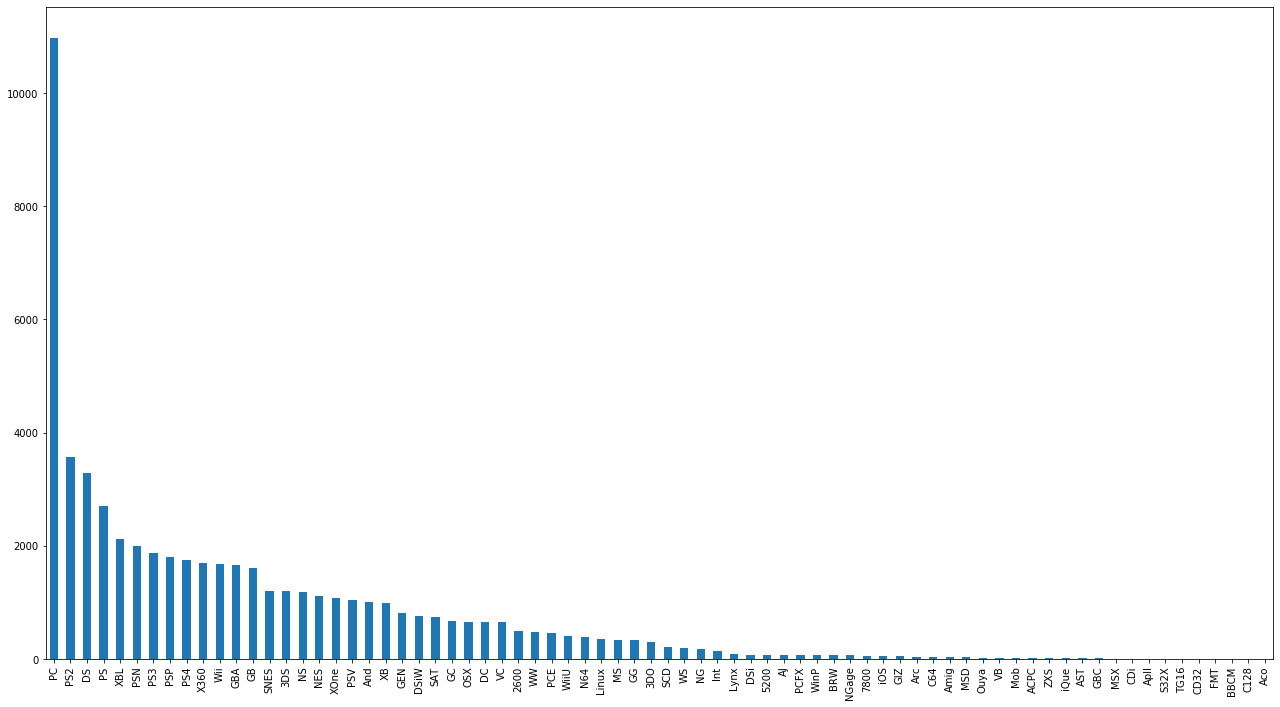

In [22]:
Games_dados.Platform.value_counts().plot(kind='bar', figsize=(22,12))

### Tipos de Dados

In [23]:
Games_dados.dtypes

Rank                  int64
Name                 object
basename             object
Genre                object
ESRB_Rating          object
Platform             object
Publisher            object
Developer            object
VGChartz_Score      float64
Critic_Score        float64
User_Score          float64
Total_Shipped       float64
Global_Sales        float64
NA_Sales            float64
PAL_Sales           float64
JP_Sales            float64
Other_Sales         float64
Year                float64
Last_Update          object
url                  object
status                int64
Vgchartzscore       float64
img_url              object
Log_Global_Sales    float64
dtype: object

In [24]:
#ajustando tipos dos dados
Games_dados['Name'] = Games_dados['Name'].astype('category')
Games_dados['basename'] = Games_dados['basename'].astype('category')
Games_dados['Genre'] = Games_dados['Genre'].astype('category')
Games_dados['Platform'] = Games_dados['Platform'].astype('category')
Games_dados['Publisher'] = Games_dados['Publisher'].astype('category')
Games_dados['Developer'] = Games_dados['Developer'].astype('category')
Games_dados['Last_Update'] = Games_dados['Last_Update'].astype('category')
Games_dados['ESRB_Rating'] = Games_dados['ESRB_Rating'].astype('category')
Games_dados['img_url'] = Games_dados['img_url'].astype('category')
Games_dados['url'] = Games_dados['url'].astype('category')

In [25]:
Games_dados.dtypes

Rank                   int64
Name                category
basename            category
Genre               category
ESRB_Rating         category
Platform            category
Publisher           category
Developer           category
VGChartz_Score       float64
Critic_Score         float64
User_Score           float64
Total_Shipped        float64
Global_Sales         float64
NA_Sales             float64
PAL_Sales            float64
JP_Sales             float64
Other_Sales          float64
Year                 float64
Last_Update         category
url                 category
status                 int64
Vgchartzscore        float64
img_url             category
Log_Global_Sales     float64
dtype: object

In [26]:
Games_dados['Genre'].cat.categories

Index(['Action', 'Action-Adventure', 'Adventure', 'Board Game', 'Education',
       'Fighting', 'MMO', 'Misc', 'Music', 'Party', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Sandbox', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'Visual Novel'],
      dtype='object')

In [27]:
Games_dados['Platform'].cat.categories 

Index(['2600', '3DO', '3DS', '5200', '7800', 'ACPC', 'AJ', 'AST', 'Aco',
       'Amig', 'And', 'ApII', 'Arc', 'BBCM', 'BRW', 'C128', 'C64', 'CD32',
       'CDi', 'DC', 'DS', 'DSi', 'DSiW', 'FMT', 'GB', 'GBA', 'GBC', 'GC',
       'GEN', 'GG', 'GIZ', 'Int', 'Linux', 'Lynx', 'MS', 'MSD', 'MSX', 'Mob',
       'N64', 'NES', 'NG', 'NGage', 'NS', 'OSX', 'Ouya', 'PC', 'PCE', 'PCFX',
       'PS', 'PS2', 'PS3', 'PS4', 'PSN', 'PSP', 'PSV', 'S32X', 'SAT', 'SCD',
       'SNES', 'TG16', 'VB', 'VC', 'WS', 'WW', 'Wii', 'WiiU', 'WinP', 'X360',
       'XB', 'XBL', 'XOne', 'ZXS', 'iOS', 'iQue'],
      dtype='object')

In [28]:
#Games_dados['Genre'] = Games_dados['Genre'].cat.codes
#Games_dados['Platform'] = Games_dados['Platform'].cat.codes
Games_dados['Code_Genre'] = Games_dados['Genre'].cat.codes
Games_dados['Code_Platform'] = Games_dados['Platform'].cat.codes

In [29]:
Games_dados.dtypes

Rank                   int64
Name                category
basename            category
Genre               category
ESRB_Rating         category
Platform            category
Publisher           category
Developer           category
VGChartz_Score       float64
Critic_Score         float64
User_Score           float64
Total_Shipped        float64
Global_Sales         float64
NA_Sales             float64
PAL_Sales            float64
JP_Sales             float64
Other_Sales          float64
Year                 float64
Last_Update         category
url                 category
status                 int64
Vgchartzscore        float64
img_url             category
Log_Global_Sales     float64
Code_Genre              int8
Code_Platform           int8
dtype: object

In [30]:
Games_dados.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url,Log_Global_Sales,Code_Genre,Code_Platform
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg,NaN,17,64
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg,NaN,10,39
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg,NaN,12,64
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,NaN,15,45
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg,NaN,17,64


## Estatisticas Bivariadas

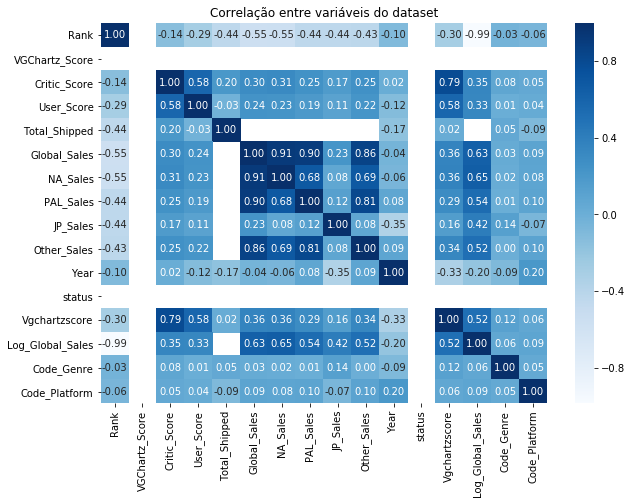

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(Games_dados.corr(),annot = True,fmt = '.2f',cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

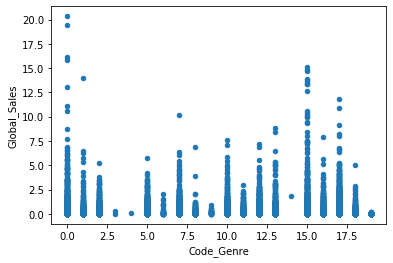

In [32]:
Games_dados.plot.scatter(x='Code_Genre',y='Global_Sales',)

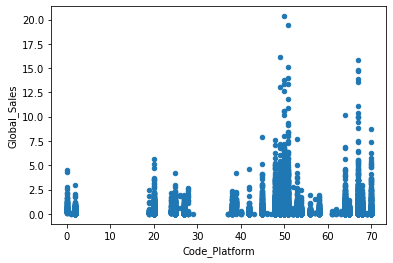

In [33]:
Games_dados.plot.scatter(y='Global_Sales',x='Code_Platform')

### Remoção de Dados

In [34]:
print(Games_dados.isnull().sum())

Rank                    0
Name                    0
basename                0
Genre                   0
ESRB_Rating         32169
Platform                0
Publisher               0
Developer              17
VGChartz_Score      55792
Critic_Score        49256
User_Score          55457
Total_Shipped       53965
Global_Sales        36377
NA_Sales            42828
PAL_Sales           42603
JP_Sales            48749
Other_Sales         40270
Year                  979
Last_Update         46606
url                     0
status                  0
Vgchartzscore       54993
img_url                 0
Log_Global_Sales    36377
Code_Genre              0
Code_Platform           0
dtype: int64


In [35]:
Games_dados.drop(['Vgchartzscore', 'VGChartz_Score'], axis='columns', inplace=True)
Games_dados.shape

(55792, 24)

In [36]:
Games_dados.drop(['Log_Global_Sales'], axis='columns', inplace=True)

In [37]:
Games_dados.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Code_Genre,Code_Platform
count,55792.000000,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000,55792.0,55792.000000,55792.000000
mean,27896.500000,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095,1.0,9.339439,43.731090
std,16105.907446,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585,0.0,6.028657,16.889183
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,0.000000,0.000000
25%,13948.750000,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,5.000000,34.000000
50%,27896.500000,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,10.000000,45.000000
75%,41844.250000,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,15.000000,53.000000
max,55792.000000,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,19.000000,73.000000


## Imputação de dados (ideia: usar median do Global_Sales por Genre/Platform para inserir nos dados zerados)

### Antes de imputar os dados

In [59]:
# Total de vendas por genre *todos possuem valor agregado
Games_dados.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Interessante: Misc é a moda porem não foi o mais vendido

Genre
Sports              1228.20
Action              1206.82
Shooter             1051.74
Misc                 596.64
Racing               547.71
Role-Playing         502.12
Platform             424.51
Fighting             363.98
Adventure            346.17
Simulation           320.32
Action-Adventure     155.45
Strategy             144.22
Puzzle               132.54
Music                 52.81
MMO                   11.86
Party                  5.39
Visual Novel           3.47
Sandbox                1.89
Board Game             0.31
Education              0.09
Name: Global_Sales, dtype: float64

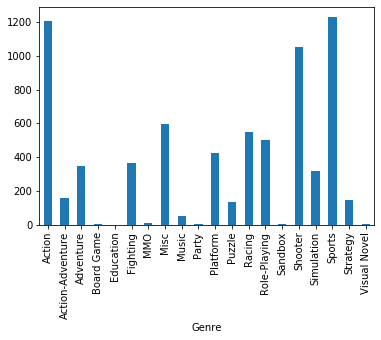

In [56]:
Games_dados.groupby('Genre')['Global_Sales'].sum().plot.bar()

In [60]:
# Total de vendas por platform (alguns estão zerados)
print(Games_dados.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head())
print(Games_dados.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).tail())

# Interessante: PC é a moda porem não foi o mais vendido

Platform
PS2     1103.62
PS3      905.72
X360     889.49
PS       627.06
PS4      585.09
Name: Global_Sales, dtype: float64
Platform
Linux    0.0
Int      0.0
GIZ      0.0
FMT      0.0
MSX      0.0
Name: Global_Sales, dtype: float64


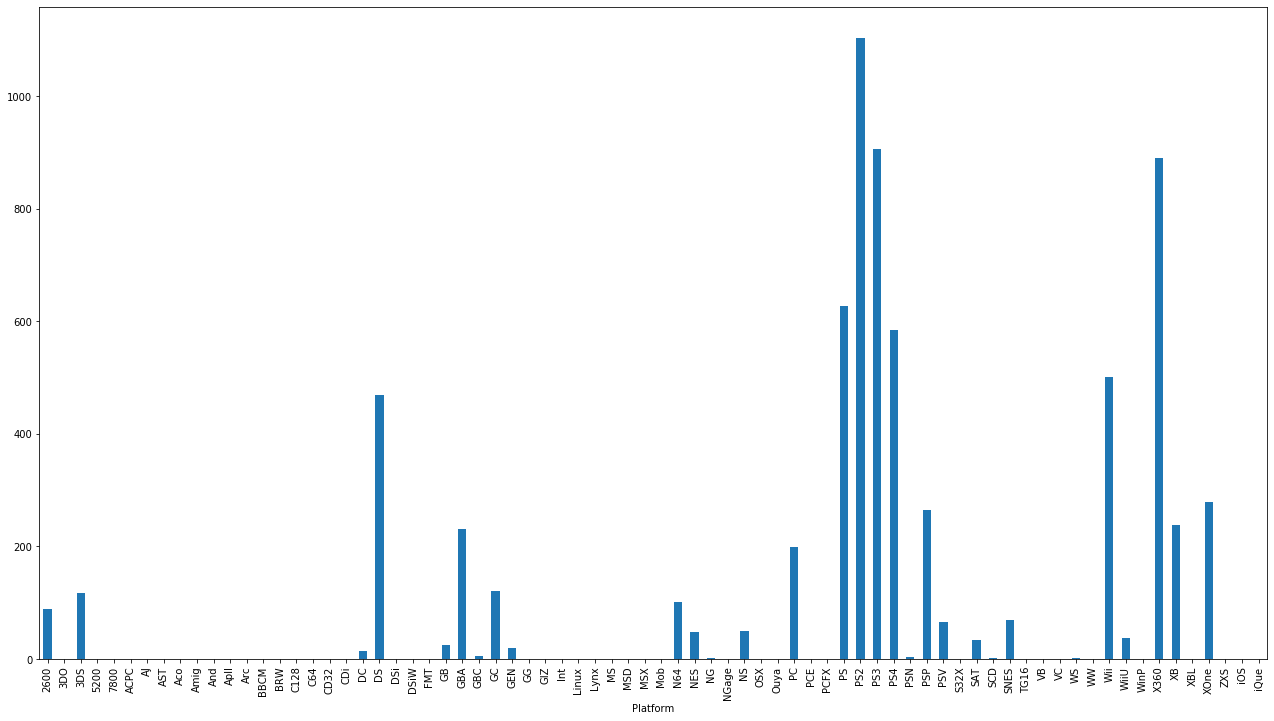

In [58]:
Games_dados.groupby('Platform')['Global_Sales'].sum().plot(kind='bar', figsize=(22,12))

In [62]:
print(Games_dados.isnull().sum())

Rank                 0
Name                 0
basename             0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
Last_Update      46606
url                  0
status               0
img_url              0
Code_Genre           0
Code_Platform        0
dtype: int64


In [61]:
Games_dados.groupby('Genre')['Global_Sales'].median()

Genre
Action              0.150
Action-Adventure    0.230
Adventure           0.040
Board Game          0.155
Education           0.090
Fighting            0.170
MMO                 0.150
Misc                0.090
Music               0.170
Party               0.135
Platform            0.180
Puzzle              0.060
Racing              0.140
Role-Playing        0.120
Sandbox             1.890
Shooter             0.180
Simulation          0.090
Sports              0.200
Strategy            0.060
Visual Novel        0.020
Name: Global_Sales, dtype: float64

In [66]:
#Games_dados[Games_dados['Global_Sales'] == 0]['Global_Sales'].fillna(Games_dados.groupby('Genre')['Global_Sales'].median())